In [1]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('Taxi-v3', render_mode="ansi")

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 500
Actions: 6


In [10]:
lr = 0.8 # learning rate
gamma = 0.95 # параметр дисконтирования

NUM_EPISODES = 3000 # число эпизодов для обучения
MAX_STEPS = 100 # максимальное число шагов в эпизоде

In [11]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):

    s = env.reset()[0]

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1

        # Выбор действия по текущей политике
        a = np.argmax(Q[s,...])

        # Сделать шаг
        s1, r, done, trunc, _ = env.step(a)

        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,...])

        # Обновление Q-функции
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target

        totalReward += r
        s = s1

        # Если конец эпизода
        if done:
            break

    pathLenList.append(step)
    totalRewardList.append(totalReward)
    print('Episode {}: Total reward = {}'.format(i, totalReward))

Episode 0: Total reward = -343
Episode 1: Total reward = -192
Episode 2: Total reward = -343
Episode 3: Total reward = -361
Episode 4: Total reward = -298
Episode 5: Total reward = -361
Episode 6: Total reward = -334
Episode 7: Total reward = -325
Episode 8: Total reward = -271
Episode 9: Total reward = -247
Episode 10: Total reward = -307
Episode 11: Total reward = -280
Episode 12: Total reward = -325
Episode 13: Total reward = -298
Episode 14: Total reward = -316
Episode 15: Total reward = -154
Episode 16: Total reward = -334
Episode 17: Total reward = -208
Episode 18: Total reward = -289
Episode 19: Total reward = -343
Episode 20: Total reward = -199
Episode 21: Total reward = -172
Episode 22: Total reward = -109
Episode 23: Total reward = -379
Episode 24: Total reward = -325
Episode 25: Total reward = -208
Episode 26: Total reward = -136
Episode 27: Total reward = -108
Episode 28: Total reward = -100
Episode 29: Total reward = -325
Episode 30: Total reward = -100
Episode 31: Total 

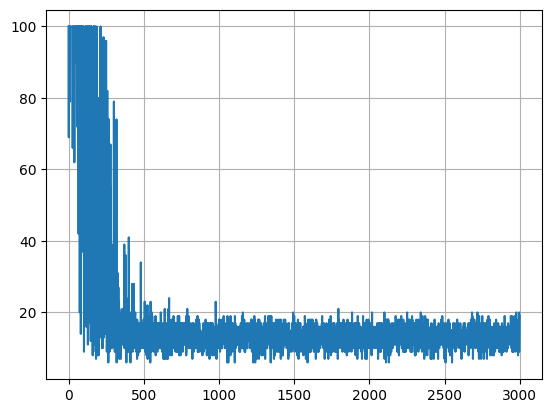

In [12]:
plt.plot(pathLenList)
plt.grid()

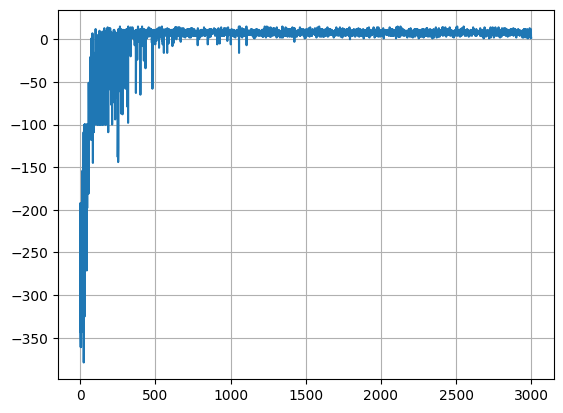

In [13]:
plt.plot(totalRewardList)
plt.grid()

In [15]:
totalReward = 0
s = env.reset()[0]

for _ in range(100):
    print(env.render())
    a = np.argmax(Q[s,:]) # выбираем оптимальное действие
    s, r, done, trunc, _ = env.step(a)
    totalReward += r
    if done:
        print(env.render())
        break

env.close()
print('Total reward = {}'.format(totalReward))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|